In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

df = pd.read_csv("../input_data/intrusion_detection/data.csv")
Y = df.xAttack
X = df.drop(['xAttack'],axis=1)
X = (X - X.mean())/X.std()
X.head()

pca = PCA(.90)
principalComponents = pca.fit(X)
X_red = pca.transform(X)
X_new = pd.DataFrame( X_red,columns=[ "pc"+str(i) for i in xrange(X_red.shape[1]) ] )

finalDf = pd.concat([X_new, df[['xAttack']]], axis = 1)

pca.explained_variance_ratio_

cov_x = np.cov(X.T)
cov_x.shape

U,S,V = np.linalg.svd(cov_x)
S_sum = float(np.sum(S))

running_sum = 0
num_of_comp = 0
for i in xrange(len(S)):
    running_sum += S[i]
    if running_sum  / S_sum  >= 0.90:
        num_of_comp = i+1
        break

U_red = U[:,:num_of_comp]
X=np.array(X)
Z = np.matmul(U_red.T, X.T)
Z = Z.T
Z_new = pd.DataFrame( Z,columns=[ "pc"+str(i) for i in xrange(Z.shape[1]) ] )



In [3]:
agm = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single').fit(Z_new)
cluster_agm = agm.labels_

In [4]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(Z_new)
cluster_k_means = kmeans.labels_

In [5]:
gmm = GaussianMixture(n_components=5, n_init=10 ).fit(Z_new)
cluster_gmm =  gmm.predict(Z_new)

In [13]:
print cluster_k_means
print cluster_gmm
for i in cluster_agm:
    print i,

[1 3 1 ... 1 0 2]
[4 1 4 ... 2 1 0]


0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [7]:
def purity(df,pred_Y,K):
    pred_Y = pd.DataFrame( pred_Y,columns=[ 'pred_Y' ] )
    df = pd.concat([df, pred_Y],axis=1)
    purity_dict = {}
    for i in xrange(K):
        sub_table = df[ df['pred_Y'] == i ]
        label, count = np.unique(sub_table['xAttack'],return_counts=True)
        mx_ind = np.argmax(count)
        purity_dict[i] = count[mx_ind] / float(len(sub_table))
    return purity_dict  



In [8]:
Z_new = pd.concat([Z_new, Y], axis=1)

purity_dict_agm = purity(Z_new, cluster_agm ,5)
purity_dict_k_means = purity(Z_new, cluster_k_means ,5)
purity_dict_gmm = purity(Z_new, cluster_gmm ,5)

In [9]:
def plot_func(purity_dict):
    val = []
    label = []
    for k,v in purity_dict.items():
        val.append(v)
        label.append(k)

    print val,
    print label

    plt.pie( val, labels = label)
    plt.show()

[0.5346352395053824, 1.0, 0.6666666666666666, 1.0, 1.0] [0, 1, 2, 3, 4]


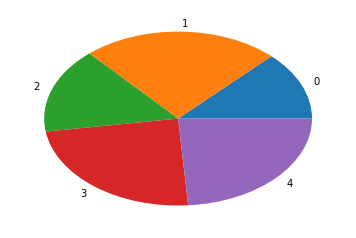

[1.0, 0.4318216994273332, 0.5230473751600512, 1.0, 0.9332376853180296] [0, 1, 2, 3, 4]


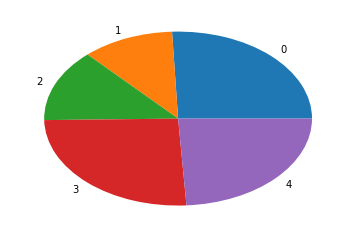

[0.8070866141732284, 0.8974595515185921, 0.9838126896950427, 0.4603442456969288, 1.0] [0, 1, 2, 3, 4]


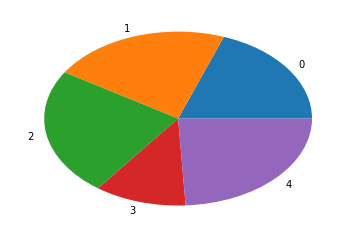

In [10]:
plot_func(purity_dict_agm)
plot_func(purity_dict_gmm)
plot_func(purity_dict_k_means)